In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('../../tradelog_IS_oneopen_valid_hours_timestop40hr.csv', index_col = 0)

In [422]:
df['open_time_fmt'] = pd.to_datetime(df['open_time']).dt.time

In [423]:
df = df[df['open_time'] < '2023-05-31']

Text(0, 0.5, 'No. of Trades')

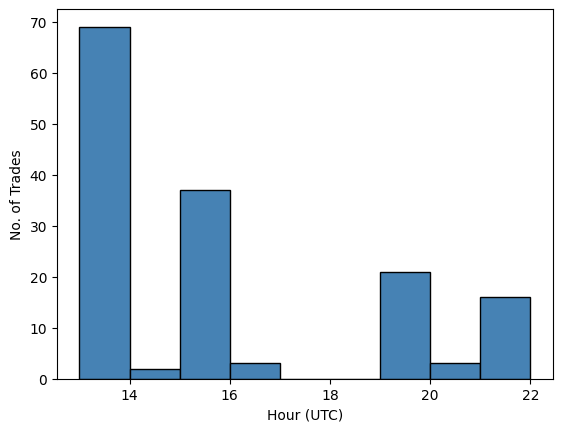

In [424]:
data = pd.to_datetime(df['open_time']).dt.hour
bin_width = 1
bins = np.arange(min(data), max(data) + bin_width, bin_width)
plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = bins, color='steelblue', edgecolor = 'black')


plt.xlabel('Hour (UTC)')
plt.ylabel('No. of Trades')
# plt.text(18,290,'USDJPY (IS)\nAll Entry Signals')
# plt.text(1.15,180,'Tokyo Open', rotation = 90)
# plt.text(5.5,180,'Sydney Close', rotation = 90)
# plt.text(7.5,220,'London Open', rotation = 90)
# plt.text(13.25,220,'NYC Open', rotation = 90)
# plt.text(20.5,100,'NYC Close', rotation = 90)
# plt.text(20.75,190,'Sydney Open', rotation = 90)

In [425]:
df['time_in_trade'] = (pd.to_datetime(df['close_time']) - pd.to_datetime(df['open_time']))/pd.Timedelta(hours = 1)
print('mode: ',df['time_in_trade'].mode())
print('mean: ',df['time_in_trade'].mean())
print('median: ',df['time_in_trade'].median())
# plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = 24)

mode:  0    24.0
Name: time_in_trade, dtype: float64
mean:  14.02317880794702
median:  13.75


(array([ 7.,  5.,  4.,  3.,  4.,  1.,  0.,  0.,  1.,  3.,  3.,  3.,  6.,
         1.,  6.,  3.,  8.,  3.,  1.,  1.,  0.,  2.,  2.,  3.,  1.,  1.,
         1.,  2.,  1.,  2.,  1.,  2.,  0.,  0.,  4.,  1.,  1.,  2.,  3.,
         1.,  0.,  0.,  0.,  1.,  3.,  0.,  2.,  2.,  3.,  3., 43.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.        ,  0.47833333,  0.95666667,  1.435     ,  1.91333333,
         2.39166667,  2.87      ,  3.34833333,  3.82666667,  4.305     ,
         4.78333333,  5.26166667,  5.74      ,  6.21833333,  6.69666667,
         7.175     ,  7.65333333,  8.13166667,  8.61      ,  9.08833333,
         9.56666667, 10.045     , 10.52333333, 11.00166667, 11.48      ,
        11.95833333, 12.43666667, 12.915     , 13.39333333, 13.871666

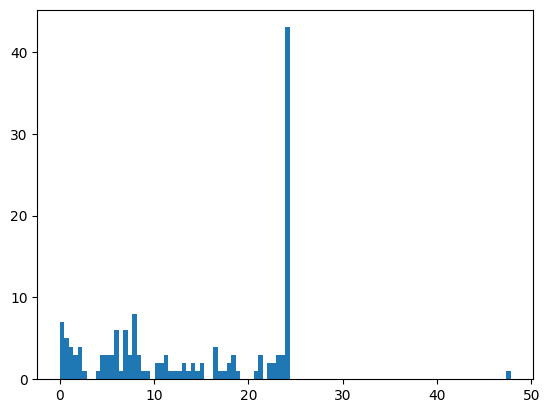

In [426]:
plt.hist(df['time_in_trade'], bins = 100)

In [427]:
hourly_summary = pd.DataFrame(index = [i for i in range(24)],columns = ['win_rate', 'PnL', 'no_trades','ATT_wins', 'ATT_losses'])



In [428]:
for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]
    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    
    de = dg[dg['PnL']>0]
    db = dg[dg['PnL']<0]
    
    PnL = dg['PnL'].sum()
    dg

    if no_trades == 0:
        hourly_summary.loc[h,'win_rate'] = 0
    else:
        hourly_summary.loc[h,'win_rate'] = wins/no_trades
    
    hourly_summary.loc[h,'PnL']     = PnL
    hourly_summary.loc[h,'no_trades'] = no_trades

    hourly_summary.loc[h,'ATT_wins'] = de['time_in_trade'].median()
    hourly_summary.loc[h,'ATT_losses'] = db['time_in_trade'].median()


for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]
    no_trades = len(dg)
    hourly_summary.loc[h,'prob_hr']     =  no_trades/hourly_summary['no_trades'].sum()
    hourly_summary.loc[h,'EV_hr']       = hourly_summary.loc[h,'prob_hr']*hourly_summary.loc[h,'PnL']





In [429]:
hourly_summary

,win_rate,PnL,no_trades,ATT_wins,ATT_losses,prob_hr,EV_hr
0,0,0.0,0,NaN,NaN,0.000000,0.000000
1,0,0.0,0,NaN,NaN,0.000000,0.000000
2,0,0.0,0,NaN,NaN,0.000000,0.000000
3,0,0.0,0,NaN,NaN,0.000000,0.000000
4,0,0.0,0,NaN,NaN,0.000000,0.000000
5,0,0.0,0,NaN,NaN,0.000000,0.000000
6,0,0.0,0,NaN,NaN,0.000000,0.000000
7,0,0.0,0,NaN,NaN,0.000000,0.000000
8,0,0.0,0,NaN,NaN,0.000000,0.000000
9,0,0.0,0,NaN,NaN,0.000000,0.000000


8


(array([1., 0., 1., 0., 0., 1., 2., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([ 0.5       ,  2.86666667,  5.23333333,  7.6       ,  9.96666667,
        12.33333333, 14.7       , 17.06666667, 19.43333333, 21.8       ,
        24.16666667, 26.53333333, 28.9       , 31.26666667, 33.63333333,
        36.        , 38.36666667, 40.73333333, 43.1       , 45.46666667,
        47.83333333]),
 <BarContainer object of 20 artists>)

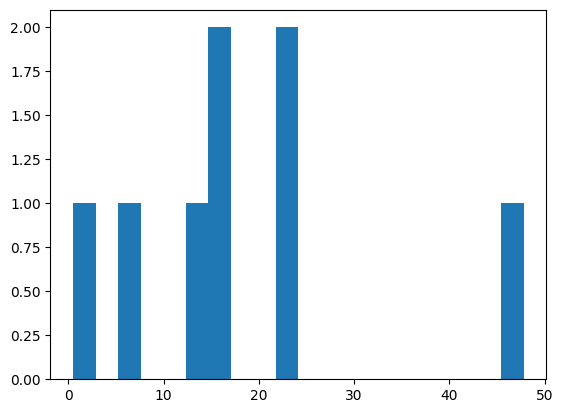

In [430]:
hour = 21
dh = df[pd.to_datetime(df['open_time']).dt.hour == hour]
dh = dh[dh['PnL']>0]
print(len(dh))
plt.hist(dh['time_in_trade'],bins = 20)

<BarContainer object of 24 artists>

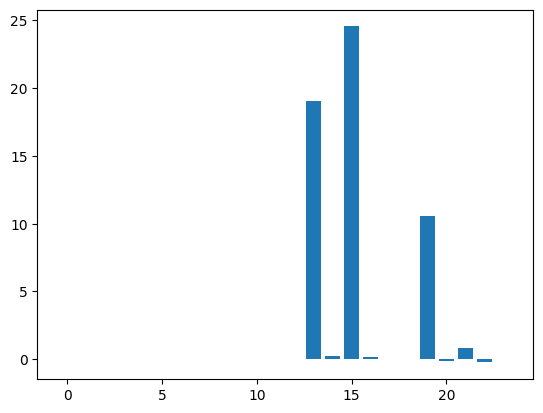

In [431]:
plt.bar(hourly_summary.index,hourly_summary['EV_hr'])

In [432]:
int(df['time_in_trade'].max())

47

In [433]:

time_in_trade_summary = pd.DataFrame(index = [i for i in range(int(df['time_in_trade'].max()+1)) ], columns = ['win_rate','PnL','no_trades','prob','EV(t)'])

for h in time_in_trade_summary.index:
    # print(h)
    dg = df[df['time_in_trade'].astype(int) == h]
    # print(dg)

    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    PnL = dg['PnL'].sum()

    if no_trades == 0:
        time_in_trade_summary.loc[h,'win_rate'] = 0
    else:
        time_in_trade_summary.loc[h,'win_rate'] = wins/no_trades
    
    time_in_trade_summary.loc[h,'PnL']     = PnL
    time_in_trade_summary.loc[h,'no_trades'] = no_trades
    

for h in time_in_trade_summary.index:
    no_trades = time_in_trade_summary.loc[h,'no_trades']
    time_in_trade_summary.loc[h,'prob'] = no_trades/time_in_trade_summary['no_trades'].sum()

for h in time_in_trade_summary.index:
    dg = time_in_trade_summary[time_in_trade_summary.index >= h]
    time_in_trade_summary.loc[h,'EV(t)'] = (dg['prob']*dg['PnL']).sum()

In [434]:
t = time_in_trade_summary[time_in_trade_summary['no_trades']!= 0]
time_in_trade_summary.head(20)

,win_rate,PnL,no_trades,prob,EV(t)
0,0.666667,11.065954,12,0.07947,11.943108
1,0.625,10.46315,8,0.05298,11.063694
2,0.5,-1.083784,4,0.02649,10.509355
3,0,0.0,0,0.0,10.538064
4,0.75,10.271439,4,0.02649,10.538064
5,0.5,17.945019,10,0.066225,10.265973
6,0.5,-12.023549,6,0.039735,9.077562
7,0.416667,-9.059998,12,0.07947,9.555318
8,0.6,-7.566935,5,0.033113,10.275318
9,0.5,1.153094,2,0.013245,10.525879


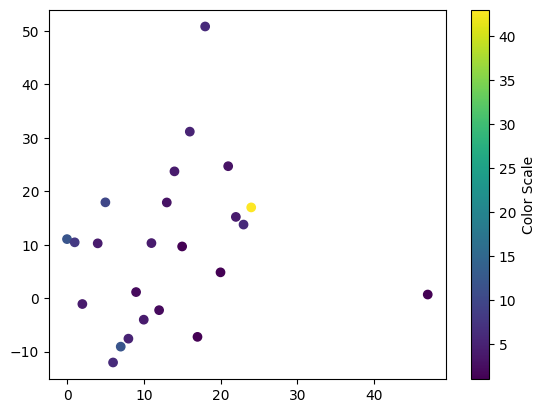

In [435]:
fig = plt.scatter(t.index,t['PnL'],c = t['no_trades'])
colorbar = plt.colorbar(fig)
colorbar.set_label('Color Scale')

<BarContainer object of 48 artists>

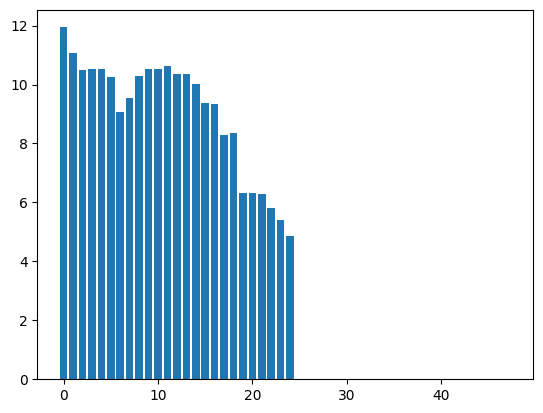

In [436]:
plt.bar(time_in_trade_summary.head(50).index,time_in_trade_summary['EV(t)'].head(50))

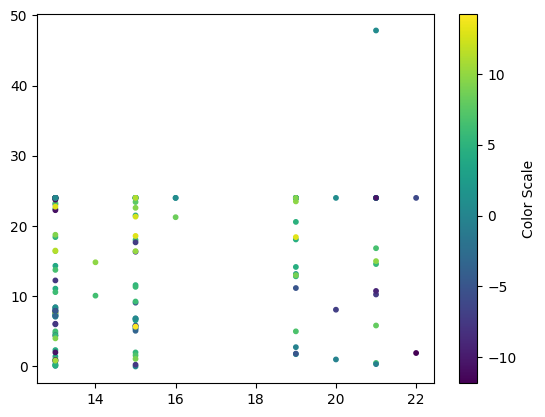

In [437]:
f =plt.scatter(pd.to_datetime(df['open_time']).dt.hour, df['time_in_trade'], s = 10,c = df['PnL'], marker= 'o')
colorbar = plt.colorbar(f)
colorbar.set_label('Color Scale')

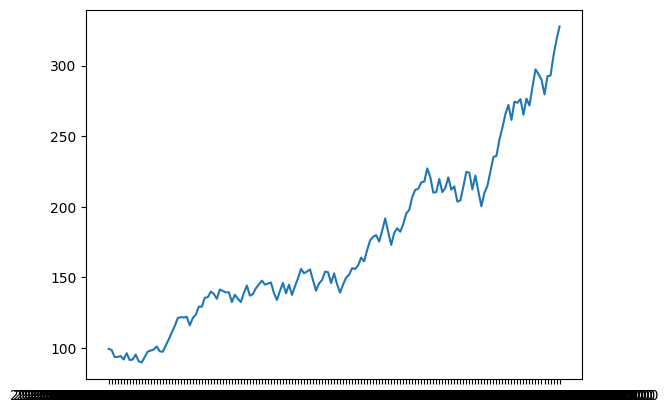

In [438]:
plt.plot(df['open_time'],df['account_balance(t)'])